### Exploratory Data Analysis 

- This notebook gives an overview for the Exploratory Data Analysis for the entire Dataset before preprocessing the text.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

# Read data from csv file
df = pd.read_csv('Original_SuicideDetection.csv')

df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [2]:
from collections import Counter
from nltk.corpus import stopwords
import ssl
import string
ssl._create_default_https_context = ssl._create_unverified_context

# Download stopwords
nltk.download('stopwords')

# Load stopwords from NLTK
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/arnav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Drop the first column 'Unnamed: 0'
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [4]:
# Check for missing values
df.isnull().sum()

text     0
class    0
dtype: int64

In [5]:
# Perform data cleaning 

# Remove URLs
df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove HTML tags
df['text'] = df['text'].apply(lambda x: re.sub(r'<.*?>', '', x))

# Remove Emojis
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Remove non-ASCII characters
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\x00-\x7f]', '', x))

# Remove numbers
df['text'] = df['text'].apply(lambda x: re.sub(r'\d+', '', x))

# Remove all items starting with @
df['text'] = df['text'].apply(lambda x: re.sub(r'@\w+', '', x))

# Remove all items starting with #
df['text'] = df['text'].apply(lambda x: re.sub(r'#\w+', '', x))

# Remove all punctuations
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Remove all stopwords
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

# Convert all text to lowercase
df['text'] = df['text'].apply(lambda x: x.lower())

# Ensuring only strings are present in the tweet_column
df = df[df['text'].apply(lambda x: isinstance(x, str))]


In [6]:
df.head()

,text,class
0,ex wife threatening suiciderecently i left wif...,suicide
1,am i weird i dont get affected compliments com...,non-suicide
2,finally almost so i never hear bad year ever i...,non-suicide
3,need helpjust help im crying hard,suicide
4,im losthello name adam ive struggling years im...,suicide


In [7]:
# Make a copy of the original dataframe
df_copy = df.copy()

In [8]:
# Visualise class-wise distribution
vals = df_copy.iloc[:].values

print(vals.shape)

(232074, 2)


In [33]:
labels = [1 if row[-1] == 'suicide' else 0 for row in vals]

print("Suicide: ", sum(labels))
print("Non-Suicide: ", len(labels)-sum(labels))

Suicide:  116037
Non-Suicide:  116037


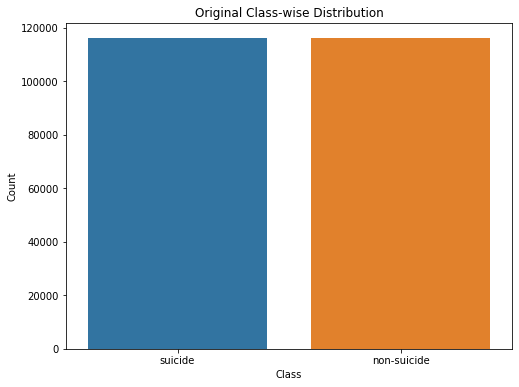

In [10]:
# Plot above class-wise distribution of text using a histogram
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class')
plt.title('Original Class-wise Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

- Text Length Analysis

Text(0, 0.5, 'Length')

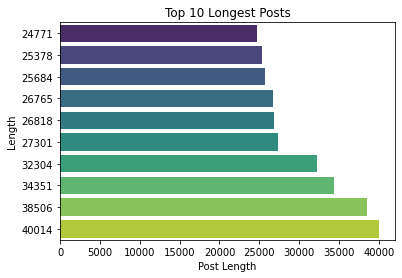

In [11]:
# Text Length Analysis
df['post_length'] = df['text'].apply(len)

# Extracting top 10 longest and top 10 shortest tweets
top_longest = df.nlargest(10, 'post_length').sort_values(by='post_length', ascending=True)
top_shortest = df.nsmallest(10, 'post_length').sort_values(by='post_length', ascending=True)

# Plotting
plt.plot(figsize=(10, 12))

# Top 10 Longest Posts
sns.barplot(x='post_length', y='post_length', data=top_longest, orient='h', palette='viridis')
plt.title('Top 10 Longest Posts')
plt.xlabel('Post Length')
plt.ylabel('Length')

- Word Frequency Analysis

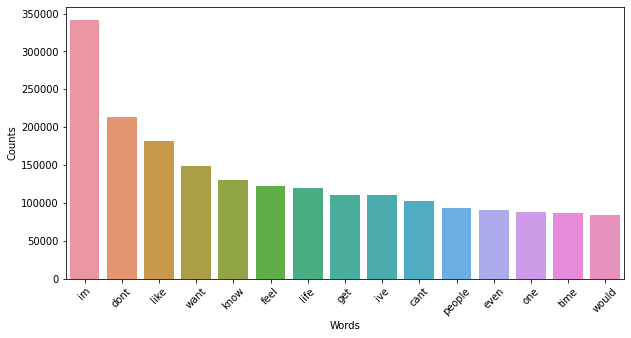

In [12]:
# Word Frequency Analysis excluding stopwords
all_words = ' '.join(df['text']).split()
filtered_words = [word for word in all_words if word.lower() not in stop_words and not any(char in string.punctuation for char in word)]
word_freq = Counter(filtered_words)
word_freq_df = pd.DataFrame(word_freq.most_common(15), columns=['Words', 'Counts'])

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x='Words', y='Counts', data=word_freq_df)
plt.xticks(rotation=45)
plt.show()

In [13]:
# Separate the data based on classes
print(df[df['class'] == 'suicide']['text'])
suicide_tweets = ' '.join(df[df['class'] == 'suicide']['text'])
non_suicide_tweets = ' '.join(df[df['class'] == 'non-suicide']['text'])

0         ex wife threatening suiciderecently i left wif...
3                         need helpjust help im crying hard
4         im losthello name adam ive struggling years im...
5         honetly idki dont know im even i feel like not...
6         trigger warning excuse self inflicted burnsi k...
                                ...                        
232061    ive fucking enoughnone depression subs helped ...
232062    paralyzing anxiety amp depression pushing edge...
232066    my mom tried kill today i feel lostits second ...
232067    im fucking scummy person i cant change itever ...
232072    the usual stuff find hereim posting sympathy p...
Name: text, Length: 116037, dtype: object


- Word Cloud Generation

In [ ]:
from wordcloud import WordCloud

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate for Suicide Class
generate_wordcloud(suicide_tweets, "Suicide Word Cloud")

In [ ]:
# Generate for Non-Suicide Class
generate_wordcloud(non_suicide_tweets, "Non_Suicide Word Cloud")

- For modelling purposes we only take 30000 samples randomly i.e. 15000 from each class

In [11]:
# Select 15000 suicide and 15000 non-suicide randomly
suicide_data = df_copy[df_copy['class'] == 'suicide'].sample(n=15000, random_state=10)
non_suicide_data = df_copy[df_copy['class'] == 'non-suicide'].sample(n=15000, random_state=10)

# Concatenate the dataframes
selected_data = pd.concat([suicide_data, non_suicide_data])

# Shuffle the data
selected_data = selected_data.sample(frac=1, random_state=42)

# Print the selected dataframe
selected_data.head()

,text,class
89740,all i want alivei want live survive,suicide
101554,happy birthday everybody come take free slice ...,non-suicide
795,id totally smash would fuck skip,non-suicide
192464,yes i gay yes i proud yes im boy uvotes left d...,non-suicide
66586,suicide hotline doesnt even answeri access gun...,suicide


In [12]:
# Check datatype
selected_data.dtypes

text     object
class    object
dtype: object

In [13]:
# Convert to string
selected_data = selected_data.astype(str)

# Print the selected dataframe
selected_data.head()

,text,class
89740,all i want alivei want live survive,suicide
101554,happy birthday everybody come take free slice ...,non-suicide
795,id totally smash would fuck skip,non-suicide
192464,yes i gay yes i proud yes im boy uvotes left d...,non-suicide
66586,suicide hotline doesnt even answeri access gun...,suicide


In [14]:
print(selected_data.shape)

# Visualise class-wise distribution
vals = selected_data.iloc[:].values

labels = [1 if row[-1] == 'suicide' else 0 for row in vals]

print("Suicide: ", sum(labels))
print("Non-Suicide: ", len(labels)-sum(labels))

(30000, 2)
Suicide:  15000
Non-Suicide:  15000


In [15]:
# Save this data to a new file
selected_data.to_csv('Final_SuicideDetection.csv', index=False)